## Red and White Wine Classification ##
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality.names

Parameters:
 - Fixed Acidity. Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
 - Volatile Acidity. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
 - Citric Acid. Found in small quantities, citric acid can add 'freshness' and flavor to wines.
 - Residual Sugar. The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
 - Chlorides. The amount of salt in the wine.
 - Free Sulfur Dioxide. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
 - Total Sulfur Dioxide. Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 - Density. The density of water is close to that of water depending on the percent alcohol and sugar content.
 - pH. Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
 - Sulphates. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
 - Alcohol. The percent alcohol content of the wine.
 - Quality. Output variable (based on sensory data, score between 0 and 10).

Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

### Correlation ###
Let us find the overall correlation between the different parameters in order to get a better idea about the relationship of similar parameters (such as 'citric acid' and 'fixed acidity') and to confirm our suspicions.

In [5]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

In [6]:
CorrelationTable(white_wine_data, 'White Wine Parameters Correletion')

C:\Users\Tamir\AppData\Local\Temp\ipykernel_17792\3193734460.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [7]:
CorrelationTable(red_wine_data, 'Red Wine Parameters Correletion')

C:\Users\Tamir\AppData\Local\Temp\ipykernel_17792\3193734460.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Lets use the Pandas Profile Report for a fast analyses:

In [8]:
red_profile = red_wine_data.profile_report(title="Red Wine Report")
red_profile.to_file(output_file="Red Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.00it/s]


In [9]:
white_profile = white_wine_data.profile_report(title="White Wine Report")
white_profile.to_file(output_file="White Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 39.97it/s]


### Lets Merge The Two ###

TODO: Use "data = data.drop(data.index[range(5)])" to make white whine's sample size similar to teh red's. (randomize it first)

In [10]:
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6039,6.7,0.340,0.31,16.4,0.051,20.0,146.0,0.99834,3.06,0.54,9.1,5,white
5110,6.5,0.190,0.28,1.4,0.046,22.0,90.0,0.99038,3.18,0.51,11.7,7,white
5305,6.6,0.150,0.34,1.0,0.037,45.0,79.0,0.98949,2.96,0.50,11.7,6,white
5458,7.3,0.250,0.26,7.2,0.048,52.0,207.0,0.99587,3.12,0.37,9.2,5,white
6014,6.3,0.305,0.22,16.0,0.061,26.0,141.0,0.99824,3.08,0.50,9.1,5,white


Use corollations in order to make linear regression learning thing.

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

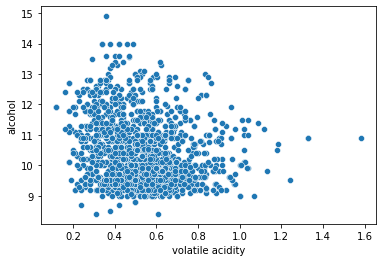

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
#sns.pairplot(wine_data)
sns.scatterplot(x='volatile acidity',y='alcohol', data = red_wine_data)
#print(sns.scatterplot(x='fixed acidity', y='quality', data=wine_data))


<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

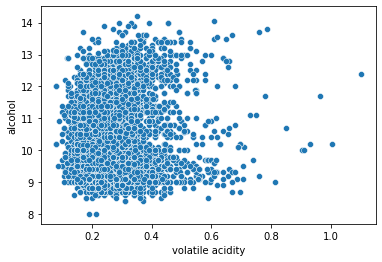

In [19]:
sns.scatterplot(x='volatile acidity',y='alcohol', data = white_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

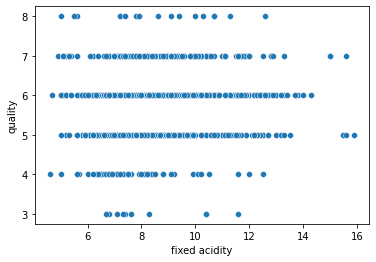

In [20]:
sns.scatterplot(x='fixed acidity', y='quality', data=red_wine_data)

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

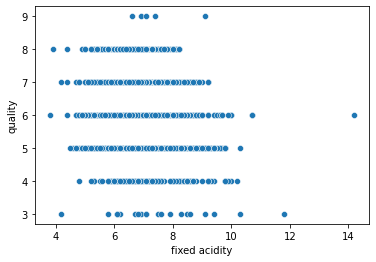

In [21]:
sns.scatterplot(x='fixed acidity', y='quality', data=white_wine_data)